<h1 style="color : red; text-align:center; font-size:40px;">Amazon Reviews Analysis Using nlp</h1>


<h1 style="color : Blue; ; font-size:15px;">TASK1:</h1> 
<h1 style="font-size: 13px;">understand the problem statement and buisness case :</h1>

1/In this project, we will use Natural Language Processing (NLP) technique
to predict customer sentiment from real Amazon Echo customer reviews .

*AI;ML-based sentiment analysis is crucial for companies to automatically
predict whether their customers are happy or not

*The process could be done automatically without having humans manually review thousands of customer reviews.

<h1 style="color : Blue; ; font-size:15px;">TASK2:</h1> <h1 style="font-size: 13px;">Import Libraries and Datasets :</h1>

view the dataframe information 
    
view dataframe statistical summary 

drop the 'date' column from the dataframe


<h1 style="color : Blue; ; font-size:15px;">TASK3:</h1> <h1 style="font-size: 13px;">Perform Data Visualization :</h1>

plot the cout plot for the rating

plot the countplot for the feedback column

roughly how many positve and negative feedback are present in the dataset?

<h1 style="color : Blue; ; font-size:15px;">TASK4:</h1> <h1 style="font-size: 13px;">Perform Data Exploration :</h1>

get the length of the verified_reviews column

plot the histogram for the length

apply the describe method to get statistical summary 

see the longest msg

view the msg with the average length

<h1 style="color : Blue; ; font-size:15px;">TASK5:</h1> <h1 style="font-size: 13px;">Plot the WordCloud :</h1>

obtain only the positvie reviews

obtain the negative reviews only

convert to list format 

join all reviews into one large string

plot the worldcloud of the 'negative' dataframe

what do we notice ? does the data make sence ?

<h1 style="color : Blue; ; font-size:15px;">TASK6:</h1> <h1 style="font-size: 13px;">Text Data Cleaning :</h1> 

join the characters again to form the string

eliminate the stopwords

create a pipeline to remove punctuations followed by removing stoopwords and test the pipeline

<h1 style="color : Blue; ; font-size:15px;">TASK7:</h1> 
<h1 style="font-size: 13px;">Perform Count Vectorization (Tokenization) :</h1>

<h1 style="color : Blue; ; font-size:15px;">TASK8:</h1>
<h1 style="font-size: 13px;">Create a pipeline to remove Punctuations, Stopwords and perform Count Vectorization :</h1>

<h1 style="color : Blue; ; font-size:15px;">TASK9:</h1> <h1 style="font-size: 13px;">Train and Test Naive Bayes Classifier Model :</h1>


# TASK #2: IMPORT LIBRARIES AND DATASETS

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [2]:
df = pd.read_csv("C:/Users/USER/Desktop/Coursera courses/Projects/Amazon Reviews Analysis Using NLP/amazon_reviews.csv")
df.head(15)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1
8,5,30-Jul-18,Heather Gray Fabric,looks great,1
9,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1


In [3]:
print(df.shape)
df.info


(3150, 5)


<bound method DataFrame.info of       rating       date         variation  \
0          5  31-Jul-18  Charcoal Fabric    
1          5  31-Jul-18  Charcoal Fabric    
2          4  31-Jul-18    Walnut Finish    
3          5  31-Jul-18  Charcoal Fabric    
4          5  31-Jul-18  Charcoal Fabric    
...      ...        ...               ...   
3145       5  30-Jul-18        Black  Dot   
3146       5  30-Jul-18        Black  Dot   
3147       5  30-Jul-18        Black  Dot   
3148       5  30-Jul-18        White  Dot   
3149       4  29-Jul-18        Black  Dot   

                                       verified_reviews  feedback  
0                                         Love my Echo!         1  
1                                             Loved it!         1  
2     Sometimes while playing a game, you can answer...         1  
3     I have had a lot of fun with this thing. My 4 ...         1  
4                                                 Music         1  
...                

In [4]:
df["date"].unique

<bound method Series.unique of 0       31-Jul-18
1       31-Jul-18
2       31-Jul-18
3       31-Jul-18
4       31-Jul-18
          ...    
3145    30-Jul-18
3146    30-Jul-18
3147    30-Jul-18
3148    30-Jul-18
3149    29-Jul-18
Name: date, Length: 3150, dtype: object>

In [5]:
is_unique = len(df['date'].unique()) == len(df['date'])

# Print the result
print("All values in the column are unique." if is_unique else "Duplicate values exist in the column.")

Duplicate values exist in the column.


In [6]:
print (df['date'].unique())

['31-Jul-18' '30-Jul-18' '29-Jul-18' '28-Jul-18' '27-Jul-18' '26-Jul-18'
 '25-Jul-18' '24-Jul-18' '23-Jul-18' '22-Jul-18' '21-Jul-18' '20-Jul-18'
 '19-Jul-18' '18-Jul-18' '17-Jul-18' '16-Jul-18' '15-Jul-18' '14-Jul-18'
 '13-Jul-18' '12-Jul-18' '11-Jul-18' '10-Jul-18' '9-Jul-18' '8-Jul-18'
 '7-Jul-18' '6-Jul-18' '5-Jul-18' '4-Jul-18' '3-Jul-18' '2-Jul-18'
 '1-Jul-18' '30-Jun-18' '29-Jun-18' '28-Jun-18' '27-Jun-18' '26-Jun-18'
 '25-Jun-18' '24-Jun-18' '23-Jun-18' '22-Jun-18' '21-Jun-18' '20-Jun-18'
 '19-Jun-18' '18-Jun-18' '17-Jun-18' '16-Jun-18' '15-Jun-18' '14-Jun-18'
 '13-Jun-18' '12-Jun-18' '11-Jun-18' '10-Jun-18' '9-Jun-18' '8-Jun-18'
 '7-Jun-18' '6-Jun-18' '5-Jun-18' '4-Jun-18' '3-Jun-18' '2-Jun-18'
 '1-Jun-18' '31-May-18' '30-May-18' '29-May-18' '28-May-18' '27-May-18'
 '26-May-18' '25-May-18' '24-May-18' '23-May-18' '22-May-18' '21-May-18'
 '20-May-18' '19-May-18' '18-May-18' '17-May-18' '16-May-18']


In [7]:
len(df['date'].unique())

77

In [8]:
### pd.to_datetime() is a function provided by the pandas library
#convert the "date" column to datetime format :
df['date'] =pd.to_datetime(df['date'])
df.head()
### Method: A function that is associated with a specific object or class and 
###operates on its data. It's accessed using dot notation (object.method()).
### pd.to_datetime() is indeed a function provided by the pandas library. 
###It is not a method associated with any specific pandas object. It's called 
#directly from the pandas module (pd).

,rating,date,variation,verified_reviews,feedback
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1
1,5,2018-07-31,Charcoal Fabric,Loved it!,1
2,4,2018-07-31,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,2018-07-31,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,2018-07-31,Charcoal Fabric,Music,1


In [9]:
df['year'] = df['date'].dt.year
df['year'].value_counts


<bound method IndexOpsMixin.value_counts of 0       2018
1       2018
2       2018
3       2018
4       2018
        ... 
3145    2018
3146    2018
3147    2018
3148    2018
3149    2018
Name: year, Length: 3150, dtype: int64>

In [10]:
df['month'] = df['date'].dt.month
df['month'].value_counts
df['month'].unique()

array([7, 6, 5], dtype=int64)

In [11]:
df['day']= df['date'].dt.day
df['day'].value_counts


<bound method IndexOpsMixin.value_counts of 0       31
1       31
2       31
3       31
4       31
        ..
3145    30
3146    30
3147    30
3148    30
3149    29
Name: day, Length: 3150, dtype: int64>

In [12]:
df['day'].unique()

array([31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15,
       14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1],
      dtype=int64)

In [14]:
df.describe()

,rating,feedback,year,month,day
count,3150.000000,3150.000000,3150.0,3150.000000,3150.000000
mean,4.463175,0.918413,2018.0,6.898730,27.174603
std,1.068506,0.273778,0.0,0.378316,5.827846
min,1.000000,0.000000,2018.0,5.000000,1.000000
25%,4.000000,1.000000,2018.0,7.000000,28.000000
50%,5.000000,1.000000,2018.0,7.000000,30.000000
75%,5.000000,1.000000,2018.0,7.000000,30.000000
max,5.000000,1.000000,2018.0,7.000000,31.000000


<h1 style="font-size: 13px;">Drop the 'date' column from the DataFrame :</h1>

In [15]:
df.drop('date', axis =1)

,rating,variation,verified_reviews,feedback,year,month,day
0,5,Charcoal Fabric,Love my Echo!,1,2018,7,31
1,5,Charcoal Fabric,Loved it!,1,2018,7,31
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1,2018,7,31
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,2018,7,31
4,5,Charcoal Fabric,Music,1,2018,7,31
...,...,...,...,...,...,...,...
3145,5,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,2018,7,30
3146,5,Black Dot,"Listening to music, searching locations, check...",1,2018,7,30
3147,5,Black Dot,"I do love these things, i have them running my...",1,2018,7,30
3148,5,White Dot,Only complaint I have is that the sound qualit...,1,2018,7,30


# TASK #3: PERFORM DATA VISUALIZATION

<AxesSubplot:>

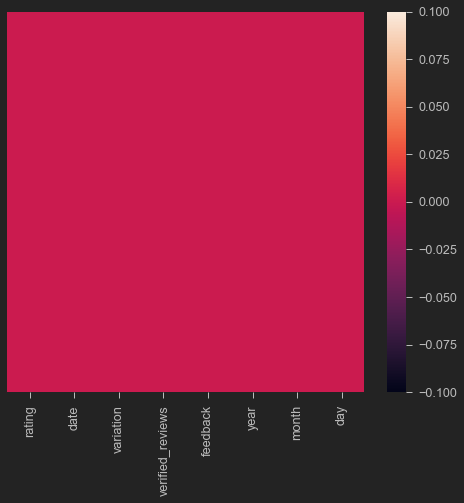

In [20]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = True)

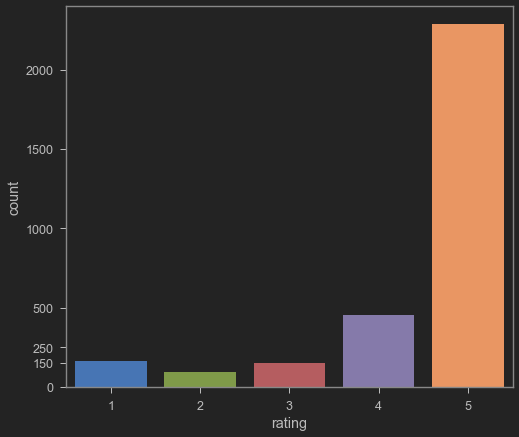

In [21]:
sns.countplot(x=df['rating'])
#Customize the y-axis ticks
plt.yticks([0,150,250,500,1000,1500,2000])
plt.show()

<AxesSubplot:xlabel='rating', ylabel='count'>

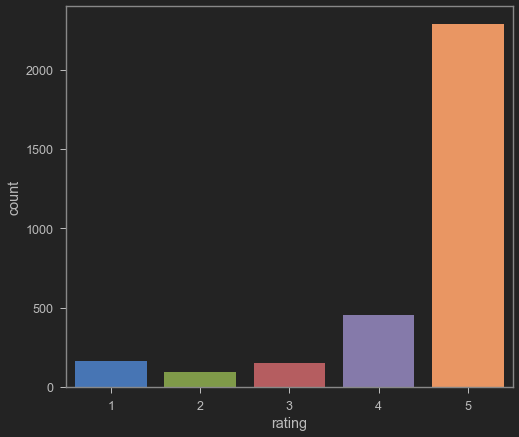

In [22]:
# Plot the count plot for the ratings
sns.countplot(x=df['rating'])

<h1 style ="font-size:14px;">Plot the Countplot for the feedback column</h1>
<h1 style ="font-size:14px;">Determine how many positive and negative feedback are present in the dataset</h1>

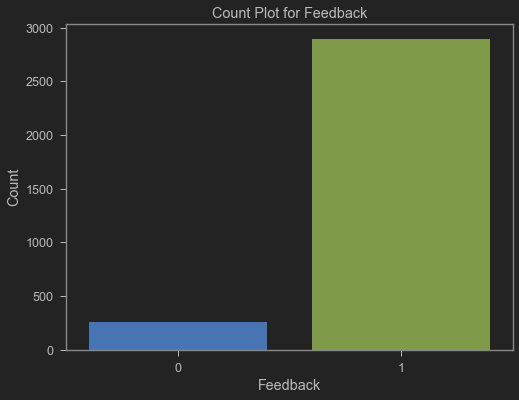

In [23]:
plt.figure(figsize=(8,6))
sns.countplot(x='feedback', data= df)
plt.title('Count Plot for Feedback')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()

In [25]:
# Calculate the approximate number of positive and negative feedback 
positive_feedback_count = (df['feedback']== 1).sum()
negative_feedback_count = (df['feedback']== 0).sum()

print("Approximate number of positive feedback:", positive_feedback_count)
print("Approximate number of negative feedback:", negative_feedback_count)

Approximate number of positive feedback: 2893
Approximate number of negative feedback: 257


# TASK #4: PERFORM DATA EXPLORATION


In [28]:
# Let's get the length of the verified_reviews column
df['length'] = df['verified_reviews'].apply(len)

In [29]:
df

,rating,date,variation,verified_reviews,feedback,year,month,day,length
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1,2018,7,31,13
1,5,2018-07-31,Charcoal Fabric,Loved it!,1,2018,7,31,9
2,4,2018-07-31,Walnut Finish,"Sometimes while playing a game, you can answer...",1,2018,7,31,195
3,5,2018-07-31,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,2018,7,31,172
4,5,2018-07-31,Charcoal Fabric,Music,1,2018,7,31,5
...,...,...,...,...,...,...,...,...,...
3145,5,2018-07-30,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,2018,7,30,50
3146,5,2018-07-30,Black Dot,"Listening to music, searching locations, check...",1,2018,7,30,135
3147,5,2018-07-30,Black Dot,"I do love these things, i have them running my...",1,2018,7,30,441
3148,5,2018-07-30,White Dot,Only complaint I have is that the sound qualit...,1,2018,7,30,380


In [30]:
columns_to_drop = ['year', 'month', 'day']
df = df.drop(columns=columns_to_drop)

In [31]:
df

,rating,date,variation,verified_reviews,feedback,length
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1,13
1,5,2018-07-31,Charcoal Fabric,Loved it!,1,9
2,4,2018-07-31,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,2018-07-31,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,2018-07-31,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,2018-07-30,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,2018-07-30,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,2018-07-30,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,2018-07-30,White Dot,Only complaint I have is that the sound qualit...,1,380


<AxesSubplot:ylabel='Frequency'>

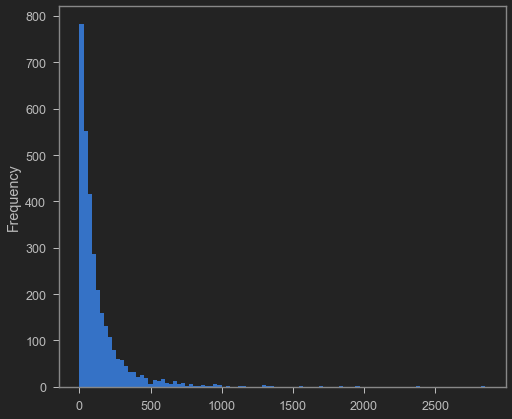

In [32]:
# Plot the histogram for the length
df['length'].plot(bins=100, kind='hist') 

In [33]:
# Apply the describe method to get statistical summary
df.describe() 

,rating,feedback,length
count,3150.000000,3150.000000,3150.000000
mean,4.463175,0.918413,132.049524
std,1.068506,0.273778,182.099952
min,1.000000,0.000000,1.000000
25%,4.000000,1.000000,30.000000
50%,5.000000,1.000000,74.000000
75%,5.000000,1.000000,165.000000
max,5.000000,1.000000,2851.000000


In [37]:
# Let's see the longest message 
df[df['length'] == 2851.000000]['verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

<h1 style = font-size:14px;>View the message with the average length</h1>

In [42]:
# Calculate the average length of the 'review' column
average_length = df['verified_reviews'].apply(len).mean()
print("The average length of the 'review' column is:", average_length)

# Find the closest length to the average length
closest_index = (df['length'] - average_length).abs().idxmin()

# Access the review with the closest length
review_with_closest_length = df.loc[closest_index, 'verified_reviews']

# Print the review
print("Review with length closest to the average length:")
print(review_with_closest_length)

The average length of the 'review' column is: 132.0495238095238
Review with length closest to the average length:
Nice. It works good.Some times is not easy to recognize your voice and you have to repeat several times, some time almost screaming.


# TASK #5: PLOT THE WORDCLOUD

In [43]:
# Obtain only the positive reviews
positive = df[df['feedback'] == 1]

In [44]:
positive

,rating,date,variation,verified_reviews,feedback,length
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1,13
1,5,2018-07-31,Charcoal Fabric,Loved it!,1,9
2,4,2018-07-31,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,2018-07-31,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,2018-07-31,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,2018-07-30,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,2018-07-30,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,2018-07-30,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,2018-07-30,White Dot,Only complaint I have is that the sound qualit...,1,380


In [45]:
negative=df[df['feedback'] == 0]

In [46]:
negative

,rating,date,variation,verified_reviews,feedback,length
46,2,2018-07-30,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,2018-07-30,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,2018-07-30,Charcoal Fabric,Not much features.,0,18
162,1,2018-07-30,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,2018-07-30,Heather Gray Fabric,Sad joke. Worthless.,0,20
...,...,...,...,...,...,...
3047,1,2018-07-30,Black Dot,Echo Dot responds to us when we aren't even ta...,0,120
3048,1,2018-07-30,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0,37
3067,2,2018-07-30,Black Dot,The only negative we have on this product is t...,0,240
3091,1,2018-07-30,Black Dot,I didn’t order it,0,17


In [47]:
# Convert to list format
sentences = positive['verified_reviews'].tolist()
len(sentences)

2893

In [48]:
# Join all reviews into one large string
sentences_as_one_string =" ".join(sentences)

In [ ]:
sentences_as_one_string

In [52]:
#!pip install wordcloud
import wordcloud
from wordcloud import WordCloud

In [55]:
!pip install pillow

In [59]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'positive' is your DataFrame containing the positive reviews
# Convert the 'verified_reviews' column to a list
sentences = positive['verified_reviews'].tolist()

# Join all reviews into one large string
sentences_as_one_string = " ".join(sentences)

# Specify the full path to the Arial font file
font_path = "C:\\Windows\\Fonts\\Arial"  # Adjust the path accordingly

# Create and display the word cloud using the specified TrueType font
plt.figure(figsize=(20, 20))
wordcloud = WordCloud(font_path=font_path).generate(sentences_as_one_string)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

OSError: cannot open resource

<Figure size 1440x1440 with 0 Axes>

In [99]:
sentences = negative['verified_reviews'].tolist()
len(sentences)
sentences_as_one_string =" ".join(sentences)
plt.figure(figsize = (20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

ValueError: Only supported for TrueType fonts

<Figure size 1440x1440 with 0 Axes>

# TASK #6: TEXT DATA CLEANING 101

In [60]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [65]:
Test = '$I Love my &job...!!!!'

In [66]:
Test_punc_removed = [char for char in Test if char not in string.punctuation]
Test_punc_removed

['I', ' ', 'L', 'o', 'v', 'e', ' ', 'm', 'y', ' ', 'j', 'o', 'b']

In [67]:
# Join the characters again to form the string.
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'I Love my job'

In [68]:
import nltk # Natural Language tool kit 
# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [69]:
Test_punc_removed_join = 'I have been enjoying these coding, programming and AI guided Projects on Rhyme and Coursera'

In [70]:
Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]

In [71]:
Test_punc_removed_join_clean

['enjoying',
 'coding,',
 'programming',
 'AI',
 'guided',
 'Projects',
 'Rhyme',
 'Coursera']

# TASK #7: PERFORM COUNT VECTORIZATION (TOKENIZATION)

In [72]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first paper.','This document is the second paper.','And this is the third one.','Is this the first paper?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)


In [73]:
print(vectorizer.get_feature_names())


['and', 'document', 'first', 'is', 'one', 'paper', 'second', 'the', 'third', 'this']


In [74]:
print(X.toarray())  

[[0 0 1 1 0 1 0 1 0 1]
 [0 1 0 1 0 1 1 1 0 1]
 [1 0 0 1 1 0 0 1 1 1]
 [0 0 1 1 0 1 0 1 0 1]]


# TASK #8: CREATE A PIPELINE TO REMOVE PUNCTUATIONS, STOPWORDS AND PERFORM COUNT VECTORIZATION

In [75]:
# Let's define a pipeline to clean up all the messages 
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [76]:
# Let's test the newly added function
df_clean = df['verified_reviews'].apply(message_cleaning)

In [78]:
# show the original review
print(df['verified_reviews'][5]) 

I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.


In [80]:
# show the cleaned up version
print(df_clean[5])

['received', 'echo', 'gift', 'needed', 'another', 'Bluetooth', 'something', 'play', 'music', 'easily', 'accessible', 'found', 'smart', 'speaker', 'Can’t', 'wait', 'see', 'else']


In [81]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning)
reviews_countvectorizer = vectorizer.fit_transform(df['verified_reviews'])

In [ ]:
print(vectorizer.get_feature_names())

In [83]:
print(reviews_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [84]:
reviews_countvectorizer.shape

(3150, 5211)

In [85]:
reviews = pd.DataFrame(reviews_countvectorizer.toarray())

In [87]:
X = reviews
X

,0,1,2,3,4,5,6,7,8,9,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
y = df['feedback']
y

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3150, dtype: int64

In [91]:
X.shape

(3150, 5211)

In [92]:
y.shape

(3150,)

# TASK #9: TRAIN AND TEST NAIVE BAYES CLASSIFIER MODEL

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [94]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [96]:
from sklearn.metrics import classification_report, confusion_matrix

<AxesSubplot:>

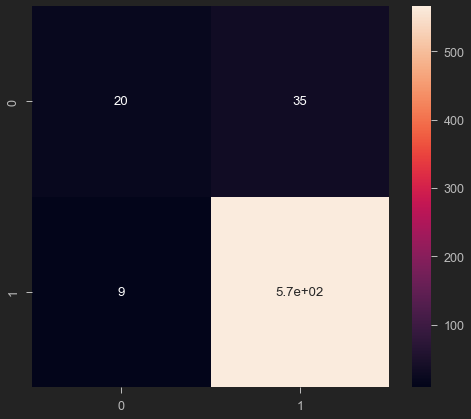

In [97]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [98]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.69      0.36      0.48        55
           1       0.94      0.98      0.96       575

    accuracy                           0.93       630
   macro avg       0.82      0.67      0.72       630
weighted avg       0.92      0.93      0.92       630



<h1 style = font-size:14px;>Train a logistic Regression Classifier and assess its performance </h1>

              precision    recall  f1-score   support

           0       0.91      0.36      0.52        55
           1       0.94      1.00      0.97       575

    accuracy                           0.94       630
   macro avg       0.93      0.68      0.74       630
weighted avg       0.94      0.94      0.93       630



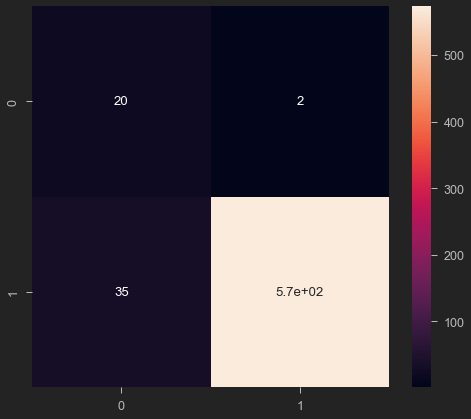

In [100]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_pred))